## chart settings

In [60]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## LaTeX reference
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook/40866155#40866155 http://docs.sympy.org/latest/tutorial/printing.html
http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html
https://reu.dimacs.rutgers.edu/Symbols.pdf

## Pricing call option with Monte Carlo sims

In [3]:
from IPython.display import display, Math, Latex
print('BSM option price')
display(Math(r'S_T(n) = S_0 e^{((r - 0.5 \sigma^2) T + \sigma z(n) \sqrt T)}'))
print('or in vector notation')
display(Math(r'\overline{S_T} = S_0 e^{((r - 0.5 \sigma^2) T + \sigma \overline{z} \sqrt T)}'))
print('where z is gaussian random variable')
display(Math(r'\overline{z}=z(n), n \in [1,...,N]'))
print('payoff')
display(Math(r'P_T(n)=max (S_T(n)-K, 0)'))
display(Math(r'\overline{P_T}=max (\overline{S_T}-K, 0)'))
print('MC estimator')
display(Math(r'C= e^{-r T} \frac{1}{N} \sum_{n=1}^N P_T(n)'))
display(Math(r'C= e^{-r T} \frac{1}{N} \sum \overline{P_T}'))
print('i.e. PV of average payoff from sims')

BSM option price


<IPython.core.display.Math object>

or in vector notation


<IPython.core.display.Math object>

where z is gaussian random variable


<IPython.core.display.Math object>

payoff


<IPython.core.display.Math object>

<IPython.core.display.Math object>

MC estimator


<IPython.core.display.Math object>

<IPython.core.display.Math object>

i.e. PV of average payoff from sims


going python

constants

In [6]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [7]:
from numpy import random, exp, sqrt, maximum, sum

N = 100000

#random.seed(1000)
z = random.standard_normal(N)
print('random component, z')
print(z)
print('vector length')
print(len(z))
ST = S0 * exp(r * T + sigma * sqrt(T) * z)
print('terminal stock values')
print(ST)
PT = maximum(ST - K, 0)
print('payoffs')
print(PT)
print('average payoff')
print(sum(PT) / N)
print('PV')
C = exp(-r * T) * sum(PT) / N
print(C)

random component, z
[ 1.90559637 -1.38007009  0.3444817  ...  0.21621266  0.33897455
 -0.21626065]
vector length
100000
terminal stock values
[153.89790991  79.77069187 112.62531644 ... 109.77279374 112.50133583
 100.67706881]
payoffs
[48.89790991  0.          7.62531644 ...  4.77279374  7.50133583
  0.        ]
average payoff
9.554584766726286
PV
9.088602168996333


In [8]:
print("Value of the European Call Option %5.3f" % C)

Value of the European Call Option 9.089


## Calculating historical volatility 
### (incl. Importing and plotting data)

#### tr_eikon_eod_data.csv contains daily closing prices for some stocks,indices&fx for like 7y
Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD

#### pkgs

In [62]:
import numpy as np
import pandas as pd

#### importing data
NB: for web imports pandas.io.data.DataReader could be used

In [63]:
quotes = pd.read_csv('resources/tr_eikon_eod_data.csv',
                     index_col=0, 
                     parse_dates=True)

print(quotes[0:5])
print('length: {}'.format(len(quotes)))

               AAPL.O  MSFT.O  INTC.O  AMZN.O    GS.N     SPY     .SPX   .VIX  \
Date                                                                            
2010-01-04  30.572827  30.950   20.88  133.90  173.08  113.33  1132.99  20.04   
2010-01-05  30.625684  30.960   20.87  134.69  176.14  113.63  1136.52  19.35   
2010-01-06  30.138541  30.770   20.80  132.25  174.26  113.71  1137.14  19.16   
2010-01-07  30.082827  30.452   20.60  130.00  177.67  114.19  1141.69  19.06   
2010-01-08  30.282827  30.660   20.83  133.52  174.31  114.57  1144.98  18.13   

              EUR=     XAU=    GDX     GLD  
Date                                        
2010-01-04  1.4411  1120.00  47.71  109.80  
2010-01-05  1.4368  1118.65  48.17  109.70  
2010-01-06  1.4412  1138.50  49.34  111.51  
2010-01-07  1.4318  1131.90  49.10  110.82  
2010-01-08  1.4412  1136.10  49.84  111.37  
length: 1972


#### creating pandas dataframe

In [64]:
amzn = pd.DataFrame(quotes['AMZN.O'])
print(amzn)

              AMZN.O
Date                
2010-01-04   133.900
2010-01-05   134.690
2010-01-06   132.250
2010-01-07   130.000
2010-01-08   133.520
2010-01-11   130.308
2010-01-12   127.350
2010-01-13   129.110
2010-01-14   127.350
2010-01-15   127.140
2010-01-19   127.610
2010-01-20   125.780
2010-01-21   126.620
2010-01-22   121.430
2010-01-25   120.310
2010-01-26   119.480
2010-01-27   122.750
2010-01-28   126.030
2010-01-29   125.410
2010-02-01   118.870
2010-02-02   118.120
2010-02-03   119.100
2010-02-04   115.940
2010-02-05   117.390
2010-02-08   116.830
2010-02-09   118.030
2010-02-10   117.360
2010-02-11   120.090
2010-02-12   119.660
2010-02-16   117.530
...              ...
2017-09-20   973.210
2017-09-21   964.650
2017-09-22   955.100
2017-09-25   939.790
2017-09-26   938.600
2017-09-27   950.870
2017-09-28   956.400
2017-09-29   961.350
2017-10-02   959.190
2017-10-03   957.100
2017-10-04   965.450
2017-10-05   980.850
2017-10-06   989.580
2017-10-09   990.990
2017-10-10   

#### renaming column

In [65]:
amzn.columns = ['close']
print(amzn)

               close
Date                
2010-01-04   133.900
2010-01-05   134.690
2010-01-06   132.250
2010-01-07   130.000
2010-01-08   133.520
2010-01-11   130.308
2010-01-12   127.350
2010-01-13   129.110
2010-01-14   127.350
2010-01-15   127.140
2010-01-19   127.610
2010-01-20   125.780
2010-01-21   126.620
2010-01-22   121.430
2010-01-25   120.310
2010-01-26   119.480
2010-01-27   122.750
2010-01-28   126.030
2010-01-29   125.410
2010-02-01   118.870
2010-02-02   118.120
2010-02-03   119.100
2010-02-04   115.940
2010-02-05   117.390
2010-02-08   116.830
2010-02-09   118.030
2010-02-10   117.360
2010-02-11   120.090
2010-02-12   119.660
2010-02-16   117.530
...              ...
2017-09-20   973.210
2017-09-21   964.650
2017-09-22   955.100
2017-09-25   939.790
2017-09-26   938.600
2017-09-27   950.870
2017-09-28   956.400
2017-09-29   961.350
2017-10-02   959.190
2017-10-03   957.100
2017-10-04   965.450
2017-10-05   980.850
2017-10-06   989.580
2017-10-09   990.990
2017-10-10   

#### tail() for a glance view

In [66]:
amzn.tail()

,close
Date,
2017-10-25,972.91
2017-10-26,972.43
2017-10-27,1100.95
2017-10-30,1110.85
2017-10-31,1105.28


#### resolving log returns

In [67]:
amzn['logRet'] = np.log(amzn['close'] / amzn['close'].shift(1))
amzn.tail()


,close,logRet
Date,,
2017-10-25,972.91,-0.003069
2017-10-26,972.43,-0.000493
2017-10-27,1100.95,0.124131
2017-10-30,1110.85,0.008952
2017-10-31,1105.28,-0.005027


#### resolving historical volatility
Mathematically, historical volatility is the standard deviation of returns
Usually, its also meant to be annualized
The following parametrization is entailed:
1. discretization step
2. sample size
3. annualization basis

Common conventions:
1 = day, 21 = month, 63 = 3 months, 252 = year

So
1. we use daily discretization = daily closing price
2. sample size is approx 1972
3. annualization basis is 252 days


In [88]:
from IPython.display import display, Math, Latex
print('step 1: returns')
print('continuously compounded return is used normally')
display(Math(r'\overline{r}=r(n)=ln\frac{C_n}{C_{n-1}}'))
display(Math(r'n\in\overline{1,N}, N=1972'))
print('r - return, continuously compounded')
print('C - closing price')
print('step 2: st dev of returns')
print('average return')
display(Math(r'E(\overline{r})=\frac{\sum\overline r}{N}'))
print('deviation squared')
display(Math(r'(\overline{r} - E(\overline{r}))^2'))
print('variance')
print('NB: N-1 for sample, not population, variance')
display(Math(r'\sigma^2=\frac{\sum{(\overline{r} - E(\overline{r}))^2}}{N-1}'))
print('standard deviation')
display(Math(r'\sigma=\sqrt{\sigma^2}'))
print('thats historical DAILY volatility')
print('step 3: annualizing')
print('applying square root law, refer to relevant materials on how volatility grows')
display(Math(r'\sigma_T=\sigma \sqrt{T}'))
print('for use discretization step is 1 day, target period is 1 year, so T=252')

step 1: returns
continuously compounded return is used normally


<IPython.core.display.Math object>

<IPython.core.display.Math object>

r - return, continuously compounded
C - closing price
step 2: st dev of returns
average return


<IPython.core.display.Math object>

deviation squared


<IPython.core.display.Math object>

variance
NB: N-1 for sample, not population, variance


<IPython.core.display.Math object>

standard deviation


<IPython.core.display.Math object>

thats historical DAILY volatility
step 3: annualizing
applying square root law, refer to relevant materials on how volatility grows


<IPython.core.display.Math object>

for use discretization step is 1 day, target period is 1 year, so T=252


With pandas we make use of built in standard deviation function std() along with rolling() to, well, roll

In [92]:
amzn['vol'] = amzn['logRet'].rolling(window=252).std() * np.sqrt(252)
print(amzn)

               close    logRet       vol
Date                                    
2010-01-04   133.900       NaN       NaN
2010-01-05   134.690  0.005883       NaN
2010-01-06   132.250 -0.018282       NaN
2010-01-07   130.000 -0.017160       NaN
2010-01-08   133.520  0.026717       NaN
2010-01-11   130.308 -0.024350       NaN
2010-01-12   127.350 -0.022962       NaN
2010-01-13   129.110  0.013726       NaN
2010-01-14   127.350 -0.013726       NaN
2010-01-15   127.140 -0.001650       NaN
2010-01-19   127.610  0.003690       NaN
2010-01-20   125.780 -0.014444       NaN
2010-01-21   126.620  0.006656       NaN
2010-01-22   121.430 -0.041853       NaN
2010-01-25   120.310 -0.009266       NaN
2010-01-26   119.480 -0.006923       NaN
2010-01-27   122.750  0.027001       NaN
2010-01-28   126.030  0.026370       NaN
2010-01-29   125.410 -0.004932       NaN
2010-02-01   118.870 -0.053558       NaN
2010-02-02   118.120 -0.006329       NaN
2010-02-03   119.100  0.008262       NaN
2010-02-04   115

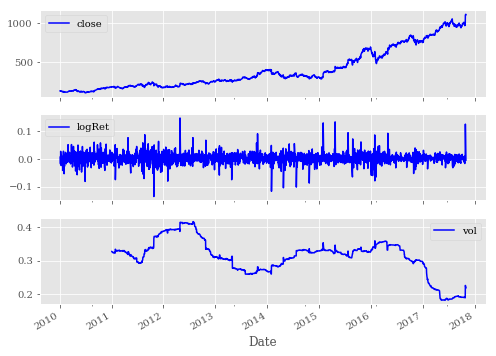

In [94]:
%matplotlib inline
amzn[['close', 'logRet', 'vol']].plot(subplots=True, 
                                      color='blue',
                                      figsize=(8, 6), 
                                      grid=True);

## Performance

Showcase of effects of different approaches on performance.
Other ways of performance improvements, compiling and compiling and parallelization, will be reviewed later.

#### vanilla loop

In [2]:
number_of_loops = 2500000
from math import *
iterations = range(1, number_of_loops)
def foo(x):
    return 3 * log(x) + cos(x) ** 2
%timeit r = [foo(x) for x in iterations]

2.1 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### numpy (vectorized)

In [3]:
import numpy as np
iterations = np.arange(1, number_of_loops)
%timeit r = 3 * np.log(iterations) + np.cos(iterations) ** 2

124 ms ± 5.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### numpy + numexpr

In [4]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(iterations) + cos(iterations) ** 2'
%timeit r = ne.evaluate(f)

97.8 ms ± 4.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### numpy+numexpr+multi-threaded

In [5]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

44.3 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


NB: use %lsmagic or %magic to get all magic cmds
Most useful could be %time, %prun